# PRÀCTICA BLOC 1 (Aprenentage Automàtic)

Autor: Narcís Rosselló Payeras

Repositorio del código: 

In [250]:
#Import librerías necesarias para el proyecto
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.base import TransformerMixin
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor

# Primera Parte: Visualización de los datos a analizar
En esta primera parte se va a importar el dataset a analizar, en concreto el archivo "airbnb.csv". Se va a realizar una exploración de cómo vienen descritos los datos y qué datos, de tal manera que se pueda hacer una primera selección de las columnas que nos va a interesar y las que no.

In [251]:
#Import del dataset a analizar
airbnb_df = pd.read_csv("airbnb.csv")

In [12]:
#Descripción general del dataset. Se tiene un total de 17.608 rows con un total de 74 columnas diferentes como son el id de
# de la casa, el url donde se encuentra el alquiler, el nombre del host, la localidad, descripción...
#Es importante ver que se tienen columnas de diferentes tipos de datos y de utilidad para el estudio muy distinto.
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17608 entries, 0 to 17607
Data columns (total 74 columns):
id                                              17608 non-null int64
listing_url                                     17608 non-null object
scrape_id                                       17608 non-null int64
last_scraped                                    17608 non-null object
name                                            17607 non-null object
description                                     17393 non-null object
neighborhood_overview                           8213 non-null object
picture_url                                     17608 non-null object
host_id                                         17608 non-null int64
host_url                                        17608 non-null object
host_name                                       17606 non-null object
host_since                                      17606 non-null object
host_location                                   17572 n

In [13]:
#Vemos entonces un primer ejemplo de la información que da cada una de las filas del dataframe, viendo que es muy disttinta de
# de una columna a otra el tipo de información
airbnb_df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11547,https://www.airbnb.com/rooms/11547,20200919153121,2020-09-21,My home at the beach,"Sun, joy, relax, quality, beach & peace.<br />...",NaN,https://a0.muscache.com/pictures/494126/8c151b...,42942,https://www.airbnb.com/users/show/42942,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.93
1,100831,https://www.airbnb.com/rooms/100831,20200919153121,2020-09-21,HOUSE IN MALLORCA - WiFi(ET-3045),<b>The space</b><br />House situated in a quie...,NaN,https://a0.muscache.com/pictures/675527/72b329...,529151,https://www.airbnb.com/users/show/529151,...,10.0,10.0,10.0,ETV-3045,t,1,1,0,0,1.47
2,105891,https://www.airbnb.com/rooms/105891,20200919153121,2020-09-20,VILLAGE HOUSE WITH POOL: IDEAL FOR FAMILIES,The house is a street on the outskirts of the ...,The village's population does not reach two th...,https://a0.muscache.com/pictures/1036816/f36ce...,549192,https://www.airbnb.com/users/show/549192,...,10.0,9.0,10.0,ETV/6127,t,2,2,0,0,0.14
3,106833,https://www.airbnb.com/rooms/106833,20200919153121,2020-09-20,Villa with a big pool in Mallorca,<b>The space</b><br />This is a restored old b...,NaN,https://a0.muscache.com/pictures/710218/98134c...,551974,https://www.airbnb.com/users/show/551974,...,10.0,9.0,9.0,ET/1961,f,1,1,0,0,0.09
4,130669,https://www.airbnb.com/rooms/130669,20200919153121,2020-09-20,Room great apartment,Located in a residential neighbourhood and 10m...,"Located in the center of the city, within minu...",https://a0.muscache.com/pictures/866653/58dc48...,643065,https://www.airbnb.com/users/show/643065,...,NaN,NaN,NaN,NaN,t,2,0,2,0,NaN


In [14]:
#Como último ejemplo para visualizar los datos se va ver un caso concreto (una fila) la información que aporta para cada
# columna.
for i in range(len(airbnb_df.iloc[0])):
    print(airbnb_df.columns[i]," ---- ",airbnb_df.iloc[0][i])

id  ----  11547
listing_url  ----  https://www.airbnb.com/rooms/11547
scrape_id  ----  20200919153121
last_scraped  ----  2020-09-21
name  ----  My home at the beach
description  ----  Sun, joy, relax, quality, beach & peace.<br />If you are looking for those valuable and precious things in live, this is your place..<br /><br /><b>The space</b><br />It´s a nice refurnished apartment  with 50 sq. meters above the mediterranean sea with one  bedroom, living room, TV, A/C, full equiped kitchen ( oven, refrigerator, coffe maker)nice balcony to the beach. It´s has private access to the beach and a big  pool.<br />Right in the middle of beach parks and walking distance to dining, nightlife, grocery!!!<br /> Perfect for your holidays. Minimum stay 5 nights.<br />If you  are interested or need any extra service at it don´t hesitate to contact me.
neighborhood_overview  ----  nan
picture_url  ----  https://a0.muscache.com/pictures/494126/8c151bd0_original.jpg
host_id  ----  42942
host_url  ----

# Segunda Parte: Selección columnas para el estudio
Como se ha podido ver durante la primera parte, se ha podido apreciar que hay una gran diversidad de columnas e información, habiendo algunas interesantes para el estudio y otras muchas que no. Las que son interesantes están directamente relacionadas con las características de la casa, tales como número de habitaciones, baños... Las que no están relacionadas o son difícilmente evaluables, tales como la descripción, la valoración, fechas, número máximo o mínimo de noches..., no van a interesar en su mayoría para el estudio.
De esta manera, tenemos que el output del modelo va a ser la columna "price".
Para esta parte, se hará una selección de las columnas más básicas, para poder ver así como se comporta el modelo. Las columnas que se van a seleccionar son las siguientes: [accommodates, rooms, bedrooms, bathrooms_text]

In [252]:
#Creación de un nuevo dataframe con las columnas seleccionadas. Se selecciona bathrooms_text en lugar de bathrooms ya que
# presentan 17600 y 0 de filas válidas respectivamente. El problema es que bathrooms_text aporta información en forma de string,
# por lo que se tendrá que modificar.
df_studied = airbnb_df[["accommodates", "beds", "bedrooms", "bathrooms_text", "price"]]

#Se cambian los nombres de las columnas
df_studied = df_studied.rename(columns={'bathrooms_text': 'bathrooms'})

In [253]:
#Visualización de las columnas
df_studied.head(10)

,accommodates,beds,bedrooms,bathrooms,price
0,2,1.0,1.0,1 bath,$89.00
1,8,7.0,4.0,3 baths,$175.00
2,6,4.0,3.0,2 baths,$140.00
3,4,4.0,2.0,1 bath,$200.00
4,2,2.0,1.0,1 bath,$110.00
5,2,0.0,NaN,1 bath,$75.00
6,3,2.0,1.0,1 bath,$90.00
7,6,4.0,3.0,2 baths,$235.00
8,2,1.0,1.0,1 private bath,$45.00
9,1,1.0,1.0,0 baths,$18.00


In [254]:
#Tipolpogía de datos de las columnas seleccionadas
df_studied.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17608 entries, 0 to 17607
Data columns (total 5 columns):
accommodates    17608 non-null int64
beds            17511 non-null float64
bedrooms        17333 non-null float64
bathrooms       17600 non-null object
price           17608 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 687.9+ KB


Con estas dos últimas celdas, se puede ver que se tienen columnas que tendrían que ser numéricas pero no lo son. Estos casos son los de "bathrooms" y "price". Por esto, se tiene que hacer una modificación de estas dos columnas para poder tratarlas de manera correcta.

In [255]:
#Modificación de los valores presentados en la columna bathrooms. Como el formato en general es el mismo, <Número> bathrooms,
# se va a coger el primer valor del string y se va a convertir a float. En caso contrario, se añade un NaN como valor.
for i in range(len(df_studied.bathrooms)):
    try:
        df_studied.bathrooms[i] = np.float64(df_studied.bathrooms[i].split()[0])
    except:
        df_studied.bathrooms[i] = np.nan

C:\Users\narcis\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\narcis\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [256]:
#Modificación de la columna price, en donde se quita el símbol '$' para así poder convertir el número resultante a float.
df_studied['price'] = df_studied['price'].str.replace(',', '')
df_studied['price'] = df_studied['price'].str.replace('$', '')

In [257]:
#Vemos si existen valores nulos/NaN en nuestro dataset
df_studied.isnull().values.any()

True

In [258]:
#Como se ve que hay valores nulos, se procede a la eliminación de todas las filas con valores nulos, NaN u otros no numéricos.
df_studied = df_studied.dropna()

In [259]:
#Una vez realizados todos los cambios de las columnas 'bathrooms' y 'price', se procede a cambiar el tipo de dato de columna
# del dataframe
df_studied = df_studied.astype({'bathrooms': 'float64', 'price':'float64'})

In [260]:
#Comprovación de que el cambio se ha realizado correctamente
df_studied.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17227 entries, 0 to 17607
Data columns (total 5 columns):
accommodates    17227 non-null int64
beds            17227 non-null float64
bedrooms        17227 non-null float64
bathrooms       17227 non-null float64
price           17227 non-null float64
dtypes: float64(4), int64(1)
memory usage: 807.5 KB


In [261]:
#Comprovación de que los datos contenidos se han cambiado correctamente y se han eliminado los NaN.
df_studied.head(10)

,accommodates,beds,bedrooms,bathrooms,price
0,2,1.0,1.0,1.0,89.0
1,8,7.0,4.0,3.0,175.0
2,6,4.0,3.0,2.0,140.0
3,4,4.0,2.0,1.0,200.0
4,2,2.0,1.0,1.0,110.0
6,3,2.0,1.0,1.0,90.0
7,6,4.0,3.0,2.0,235.0
8,2,1.0,1.0,1.0,45.0
9,1,1.0,1.0,0.0,18.0
10,2,1.0,1.0,1.0,50.0


**Eliminación de los Outliers**

In [262]:
#Se utiliza la librería de sklearn de IsolationForest para quitar los outliers del dataframe
def DropOutliers(X):
    #X_aux = X.drop(column, axis=1)
    iso = IsolationForest(contamination=0.1, behaviour = "new")
    
    yhat = iso.fit_predict(X)
    mask = yhat != -1
    return X.iloc[mask, :]

In [263]:
#Eliminación de casi 2000 filas que actuan como outliers del dataframe
print("Rows with outliers: ", len(df_studied))
df_studied_outliers = DropOutliers(df_studied)
print("Rows sin outliers: ", len(df_studied_outliers))

Rows with outliers:  17227
Rows sin outliers:  15504


In [264]:
#Comprovación de si existen filas con precios igual a 0
len(df_studied_outliers.loc[(df_studied_outliers.price == 0)])

0

<Figure size 720x432 with 0 Axes>

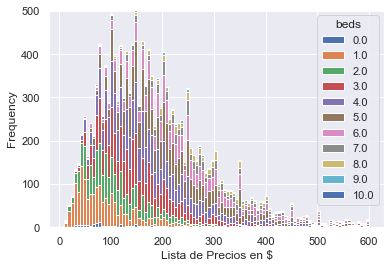

In [270]:
#Exploración de los datos, visulizando como se comporta el precio en función de la columna 'beds'. Se va a eliminar los precios
# mayores a 600 para tener una mejor vidualización del gráfico.
plt.figure(figsize=(10,6))
df_studied_outliers.loc[(df_studied_outliers.price <= 600)].pivot(columns = 'beds',values = 'price').plot.hist(stacked = True,bins=100)
plt.xlabel('Lista de Precios en $')
plt.show()

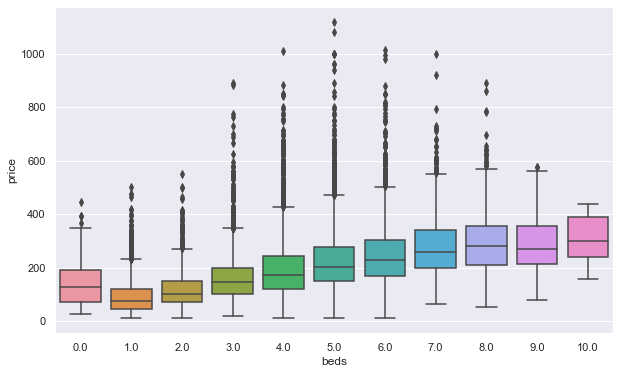

In [269]:
#En el anterior gráfico se puede observar como el rango de precios de los alquileres con 0 camas es bastante amplio. Para
# tener una mejor visualización de lo que ocurre, se va a realizar un boxplot.
#Como se puede ver, es curioso observar como la media de los alquileres con 0 camas es superior los alquileres con 1 y 2 camas.
plt.figure(figsize=(10,6))
sns.boxplot(y='price', x='beds', data = df_studied_outliers)
plt.show()

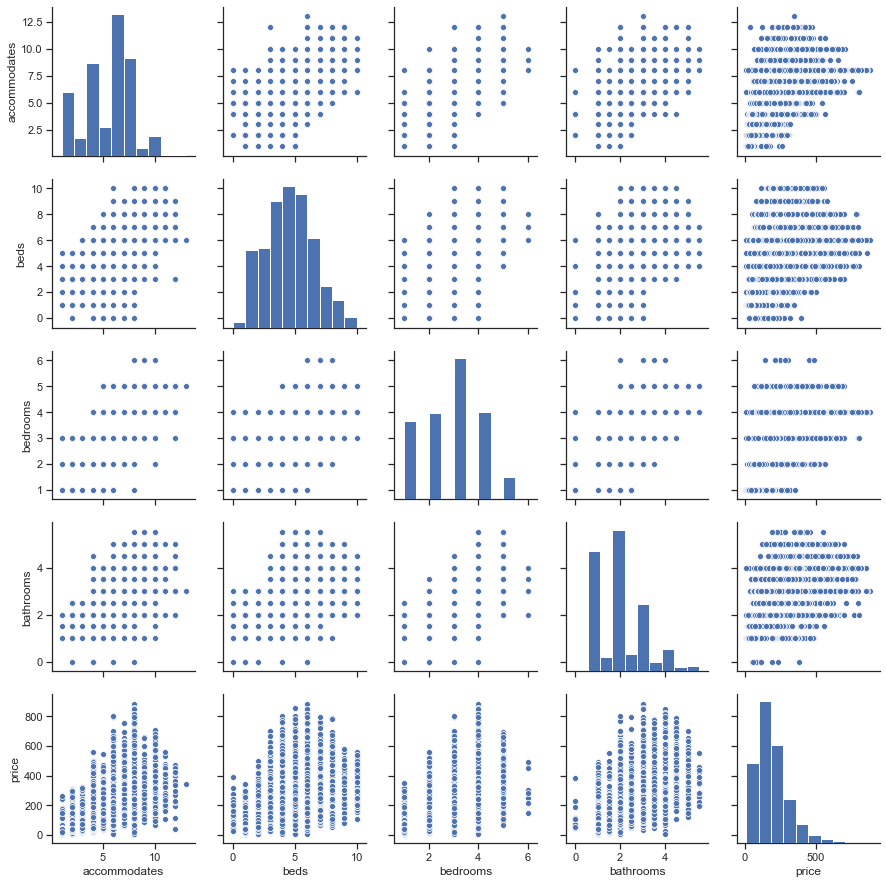

In [174]:
#Finalmente se va a hacer una visualización general de todas las columnas seleccionadas del dataframe en forma de pairplot
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_studied_outliers)

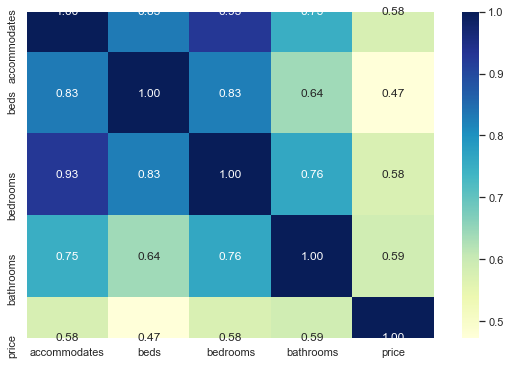

In [271]:
#Se va a realizar finalmente un corrplot para visualizar y eliminar aquellas columnas que estén correlacionadas entre ellas.
#Se puede ver como las columnas 'accommodates', 'beds' y 'bedrooms' están correlacionadas entre ellas, por lo que solo se va a
# conservar una de estas
corrMatrix = df_studied_outliers.corr(method='pearson')

plt.figure(figsize=(10,6))
sns.set(font_scale=1)
sns.heatmap(corrMatrix, cbar = True, annot=True, square = True, fmt = '.2f', cmap="YlGnBu")

plt.show()

In [272]:
#Dataframe final con columnas 'beds', 'bathrooms' y 'price'
df_studied_outliers = df_studied_outliers[['beds', 'bathrooms', 'price']]
df_studied_outliers

,beds,bathrooms,price
0,1.0,1.0,89.0
1,7.0,3.0,175.0
2,4.0,2.0,140.0
3,4.0,1.0,200.0
4,2.0,1.0,110.0
...,...,...,...
17603,4.0,3.5,195.0
17604,8.0,3.0,110.0
17605,4.0,2.0,179.0
17606,1.0,1.0,42.0


# Tercera Parte: Aplicación Modelos

**Regresión Lineal**

In [273]:
#Creación de dos pipelines de trabajo. Estos pipelines van a contener los métodos de escalado de los datos, entrenados con los
# datos de train. El primer pipeline utiliza el método de preprocesamiento de MinMaxScaler() y el segundo utiliza el método de
# escalado de StandardScaler().

poly_step = ('poly', PolynomialFeatures(2,  interaction_only=True))

mm_scaler_step = ('scaler', MinMaxScaler())
std_scaler_step = ('scaler', StandardScaler())


num_pipe_steps_MM = [poly_step, mm_scaler_step]
num_pipe_steps_SC = [poly_step, std_scaler_step]

num_pipe_MM = Pipeline(num_pipe_steps_MM)
num_pipe_SC = Pipeline(num_pipe_steps_SC)

In [274]:
#Modelo de Regresión Lineal con el pipeline de MinMaxScaler() y el pipeline de StandardScaler()
regr1 = linear_model.LinearRegression()
regr2 = linear_model.LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(df_studied_outliers.drop('price', axis=1), df_studied_outliers.price, test_size=0.2)

X_train_trans_MM = num_pipe_MM.fit_transform(X_train)
regr1.fit(X_train_trans_MM, y_train)
X_train_trans_SC = num_pipe_SC.fit_transform(X_train)
regr2.fit(X_train_trans_SC, y_train)

y_test_pred_pipe_MM = regr1.predict(num_pipe_MM.transform(X_test))
y_test_pred_pipe_SC = regr2.predict(num_pipe_SC.transform(X_test))

print("Pipeline con MinMaxScaler()")
print('Mean squared error MSE: %.2f' % mean_squared_error(y_test, y_test_pred_pipe_MM))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_test_pred_pipe_MM))
print('Mean absolute error MAE: %.2f' % mean_absolute_error(y_test, y_test_pred_pipe_MM))
print()
print("Pipeline con StandardScaler()")
print('Mean squared error MSE: %.2f' % mean_squared_error(y_test, y_test_pred_pipe_SC))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_test_pred_pipe_SC))
print('Mean absolute error MAE: %.2f' % mean_absolute_error(y_test, y_test_pred_pipe_SC))

Pipeline con MinMaxScaler()
Mean squared error MSE: 8805.56
Coefficient of determination: 0.39
Mean absolute error MAE: 67.13

Pipeline con StandardScaler()
Mean squared error MSE: 8805.56
Coefficient of determination: 0.39
Mean absolute error MAE: 67.13


En la celda anterior se puede ver como el escalado de los datos no afecta al resultado, obteniendo unos valores de coeficiente de determinación (r2_score) de alrededor 0.4. Para tratar de mejorar estos resultados se va a realizar el mismo proceso pero con otro modelo.

En la siguiente celda se tiene un ejemplo del funcionamiento del modelo. Se tiene un posible alquiler de una casa con 1 bed y 1 bathroom, con lo que el modelo es capaz de predecir un valor de 92 dolars. En el segundo caso se tiene un alquiler de una casa con 5 beds y 3 bathrooms, por lo que el modelo predice un precio de 264 dolars.

In [284]:
d = {'beds': [1, 5], 'bathrooms': [1, 3]}
df_aux = pd.DataFrame(data=d)
result = regr1.predict(num_pipe_MM.transform(df_aux))
print("Precio primer caso: ", round(result[0]),"$")
print("Precio segundo caso: ", round(result[1]),"$")

Precio primer caso:  92.0 $
Precio segundo caso:  264.0 $


**Regresión con Random Forest**

In [285]:
#Modelo de Regresión con Random Forest con el pipeline de MinMaxScaler() y el pipeline de StandardScaler()
reg1 = RandomForestRegressor(n_estimators = 100)
reg2 = RandomForestRegressor(n_estimators = 100)

X_train, X_test, y_train, y_test = train_test_split(df_studied_outliers.drop('price', axis=1), df_studied_outliers.price, test_size=0.2)

X_train_trans_MM = num_pipe_MM.fit_transform(X_train)
reg1.fit(X_train_trans_MM, y_train)
X_train_trans_SC = num_pipe_SC.fit_transform(X_train)
reg2.fit(X_train_trans_SC, y_train)

y_test_pred_pipe_MM = reg1.predict(num_pipe_MM.transform(X_test))
y_test_pred_pipe_SC = reg2.predict(num_pipe_SC.transform(X_test))

print("Pipeline con MinMaxScaler()")
print('Mean squared error MSE: %.2f' % mean_squared_error(y_test, y_test_pred_pipe_MM))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_test_pred_pipe_MM))
print('Mean absolute error MAE: %.2f' % mean_absolute_error(y_test, y_test_pred_pipe_MM))
print()
print("Pipeline con StandardScaler()")
print('Mean squared error MSE: %.2f' % mean_squared_error(y_test, y_test_pred_pipe_SC))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_test_pred_pipe_SC))
print('Mean absolute error MAE: %.2f' % mean_absolute_error(y_test, y_test_pred_pipe_SC))

Pipeline con MinMaxScaler()
Mean squared error MSE: 8984.26
Coefficient of determination: 0.38
Mean absolute error MAE: 66.10

Pipeline con StandardScaler()
Mean squared error MSE: 8985.04
Coefficient of determination: 0.38
Mean absolute error MAE: 66.03


En la celda anterior, se ha visto como los resultados no mejoran mucho al utilizar un modelo diferente. Esto da a pensar que las columnas seleccionadas no son suficientes para la predicción de buenos resultados.

# Cuarta Parte: Ampliación de las columnas seleccionadas
Para esta cuarta parte se va a hacer una ampliación de la selección de columnas hecha en la segunda parte. Las columnas que se va a añadir a las ya seleccionadas anteriormente van a ser: 'neighbourhood_cleansed', 'property_type' y 'room_type'

In [286]:
#Selección de las columnas a estudiar. La columna 'bedrooms' no se elige para evitar la correlación vista en el apartado 2
df_studied = airbnb_df[["beds", "bathrooms_text", "neighbourhood_cleansed", "property_type", "room_type", "price"]]

#Se cambian los nombres de las columnas
df_studied = df_studied.rename(columns={'bathrooms_text': 'bathrooms', 'neighbourhood_cleansed':'localidad'})

df_studied.head(10)

,beds,bathrooms,localidad,property_type,room_type,price
0,1.0,1 bath,Calvià,Entire apartment,Entire home/apt,$89.00
1,7.0,3 baths,Santa Margalida,Entire house,Entire home/apt,$175.00
2,4.0,2 baths,Maria de la Salut,Entire townhouse,Entire home/apt,$140.00
3,4.0,1 bath,Sant Llorenç des Cardassar,Entire villa,Entire home/apt,$200.00
4,2.0,1 bath,Palma de Mallorca,Private room in apartment,Private room,$110.00
5,0.0,1 bath,Palma de Mallorca,Entire guesthouse,Entire home/apt,$75.00
6,2.0,1 bath,Selva,Entire villa,Entire home/apt,$90.00
7,4.0,2 baths,Esporles,Entire house,Entire home/apt,$235.00
8,1.0,1 private bath,Palma de Mallorca,Private room in guest suite,Private room,$45.00
9,1.0,0 baths,Palma de Mallorca,Private room in apartment,Private room,$18.00


In [287]:
#Modificación de los datos pasando de string a numérico
for i in range(len(df_studied.bathrooms)):
    try:
        df_studied.bathrooms[i] = np.float64(df_studied.bathrooms[i].split()[0])
    except:
        df_studied.bathrooms[i] = np.nan

C:\Users\narcis\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\narcis\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [288]:
#Modificación de la columna price, pasando de valor string a valor numérico
df_studied['price'] = df_studied['price'].str.replace(',', '')
df_studied['price'] = df_studied['price'].str.replace('$', '')

In [289]:
#Función para la eliminación de los outliers del dataframe. Se utiliza la la función IsolationForest con un parámetro de
# contaminación del 0.1
def DropOutliers(X, columns):
    X_aux = X.drop(columns, axis=1)
    iso = IsolationForest(contamination=0.1, behaviour = "new", random_state=0)
    
    yhat = iso.fit_predict(X_aux)
    mask = yhat != -1
    return X.iloc[mask, :]

In [290]:
#Se eliminan los valores nulos y se cambia el tipo de valores que contienen las dos columnas de bathrooms y price
df_studied = df_studied.dropna()
df_studied = df_studied.astype({'bathrooms': 'float64', 'price':'float64'})

#Se eliminan los filas que actuan como outliers del dataframe
df_studied_outliers = DropOutliers(df_studied, ["localidad","property_type", "room_type"])

In [291]:
df_studied_outliers.head(5)

,beds,bathrooms,localidad,property_type,room_type,price
0,1.0,1.0,Calvià,Entire apartment,Entire home/apt,89.0
1,7.0,3.0,Santa Margalida,Entire house,Entire home/apt,175.0
2,4.0,2.0,Maria de la Salut,Entire townhouse,Entire home/apt,140.0
3,4.0,1.0,Sant Llorenç des Cardassar,Entire villa,Entire home/apt,200.0
4,2.0,1.0,Palma de Mallorca,Private room in apartment,Private room,110.0


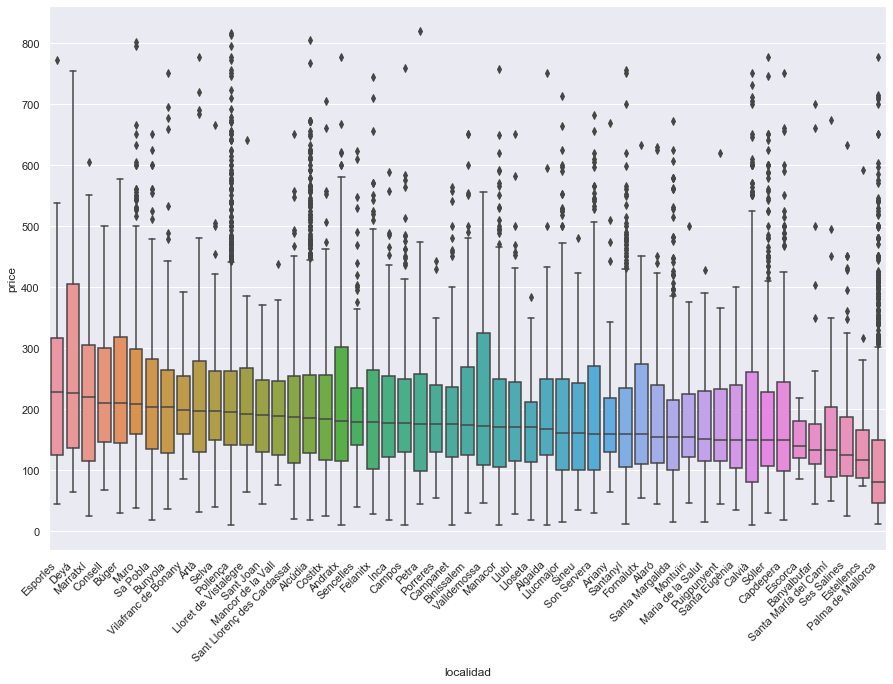

In [292]:
#Boxplot en donde se analiza como actúa la localidad en función del precio. Se puede ver claramente que las diferentes 
# localidades tienen un rango de valores distintos, denotado así por la media de estos. De esta manera se tiene que la 
# localidad más cara es Deià, mientras que la más barata es Palma de Mallorca.
plt.figure(figsize=(15,10))
sort_price = df_studied_outliers\
                    .groupby('localidad')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='localidad', data=df_studied_outliers, 
            order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

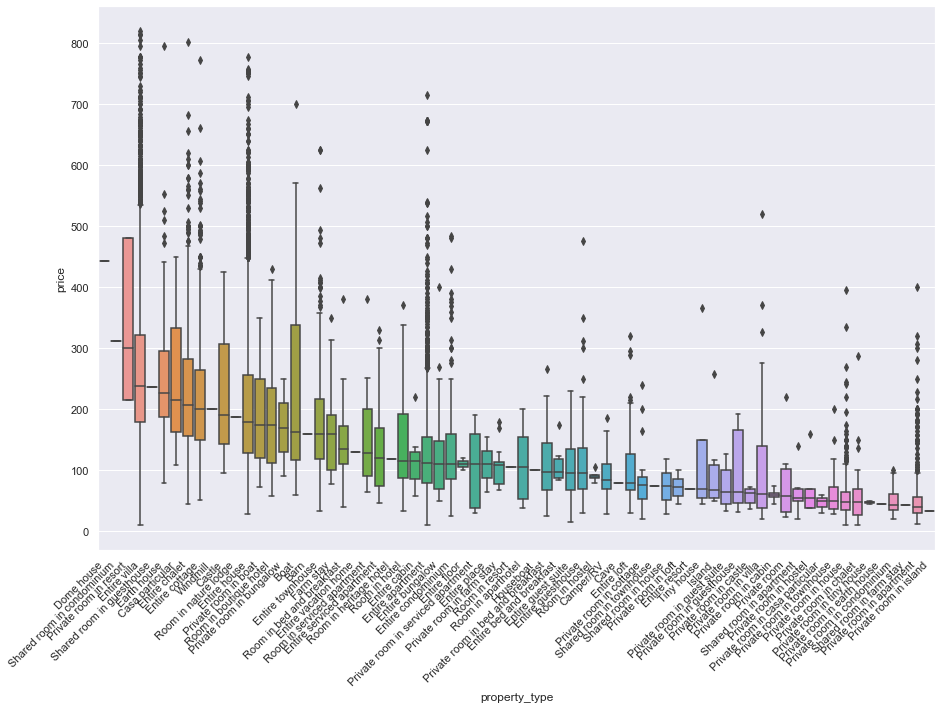

In [293]:
#Boxplot en donde se relaciona el tipo de propiedad con el precio. Se puede ver como los diferentes tipos de propiedades
# tienen tendencia a tener valores diferentes, siendo el más caro el Dome house y el más barato el Private room in island.
plt.figure(figsize=(15,10))
sort_price = df_studied_outliers\
                    .groupby('property_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='property_type', data=df_studied_outliers, order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

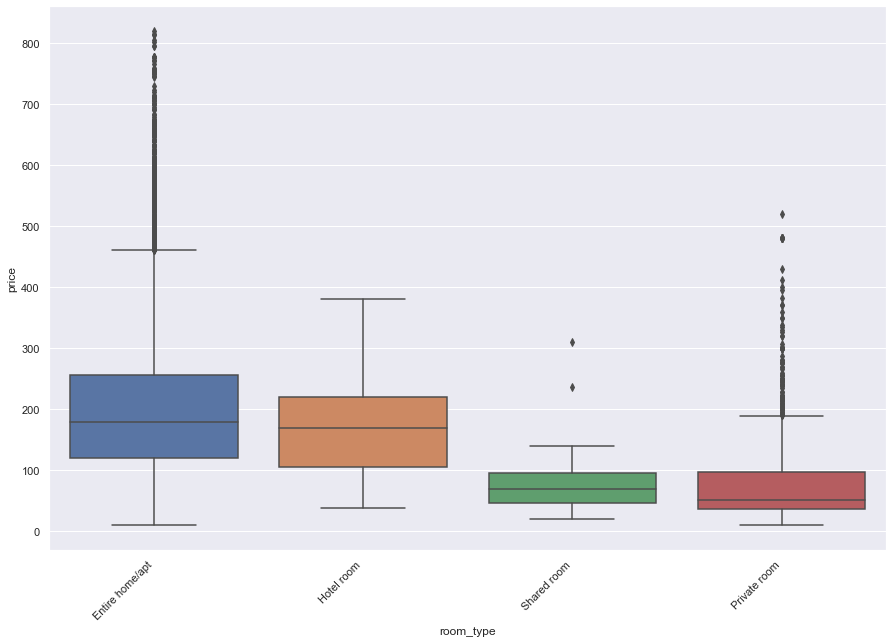

In [294]:
#Boxplot en donde se relaciona el tipo de habitación con el precio. Se puede ver como hay dos grupos diferenciables de gama
# de precios. Por una parte se tienen los entire home/apt y las habitaciones de hotel como más caros, mientras que por otra
# parte se tienen las habitaciones compartidas y habitaciones individuales como más baratas.
plt.figure(figsize=(15,10))
sort_price = df_studied_outliers\
                    .groupby('room_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='room_type', data=df_studied_outliers, order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

Con la elección de estas 3 columnas más que en la parte 3, se espera que la predicción sea mejor, ya que se dispone de más información con la que poder obtener resultados.

**Pipelines**

In [295]:
#Clases auxiliares para la selección de las columnas categóricas y numéricas
class SelectColumns(TransformerMixin):
    def __init__(self, columns: list) -> pd.DataFrame:
        if not isinstance(columns, list):
            raise ValueError('Specify the columns into a list')
        self.columns = columns
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.columns]
    
class DropColumns(TransformerMixin):
    def __init__(self, columns: list) -> pd.DataFrame:
        if not isinstance(columns, list):
            raise ValueError('Specify the columns into a list')
        self.columns = columns
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.drop(self.columns, axis=1)

In [296]:
#Pipeline de selección y modificación de los datos categóricos del dataframe
select_col_step = ('select', SelectColumns(['localidad', 'property_type', 'room_type']))

one_hot_step = ('localidad_one_hot', OneHotEncoder(sparse=False))

cat_pipe_steps = [select_col_step, one_hot_step]

cat_pipe = Pipeline(cat_pipe_steps)

In [297]:
#Vector transformado de las categorías de las tres columnas seleccionadas
cat_pipe.fit_transform(df_studied_outliers)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [298]:
#Lista de categorías diferentes
cat_pipe['localidad_one_hot'].categories_

[array(['Alaró', 'Alcúdia', 'Algaida', 'Andratx', 'Ariany', 'Artà',
        'Banyalbufar', 'Binissalem', 'Bunyola', 'Búger', 'Calvià',
        'Campanet', 'Campos', 'Capdepera', 'Consell', 'Costitx', 'Deyá',
        'Escorca', 'Esporles', 'Estellencs', 'Felanitx', 'Fornalutx',
        'Inca', 'Lloret de Vistalegre', 'Lloseta', 'Llubí', 'Llucmajor',
        'Manacor', 'Mancor de la Vall', 'Maria de la Salut', 'Marratxí',
        'Montuïri', 'Muro', 'Palma de Mallorca', 'Petra', 'Pollença',
        'Porreres', 'Puigpunyent', 'Sa Pobla', 'Sant Joan',
        'Sant Llorenç des Cardassar', 'Santa Eugènia', 'Santa Margalida',
        'Santa María del Camí', 'Santanyí', 'Selva', 'Sencelles',
        'Ses Salines', 'Sineu', 'Son Servera', 'Sóller', 'Valldemossa',
        'Vilafranc de Bonany'], dtype=object),
 array(['Barn', 'Boat', 'Camper/RV', 'Casa particular', 'Castle', 'Cave',
        'Dome house', 'Earth house', 'Entire apartment',
        'Entire bed and breakfast', 'Entire bungalow', '

In [299]:
#Pipeline de preparación de los datos de las columnas numéricas, preprocesado por el MinMaxScaler y por el StandardScaler en
# las dos variantes del pipeline
drop_column_step = ('drop_column', DropColumns(['localidad', 'property_type', 'room_type']))

poly_step = ('poly', PolynomialFeatures(2,  interaction_only=True))

mm_scaler_step = ('scaler', MinMaxScaler())
std_scaler_step = ('scaler', StandardScaler())


num_pipe_steps_MM = [drop_column_step, poly_step, mm_scaler_step]
num_pipe_steps_SC = [drop_column_step, poly_step, std_scaler_step]

num_pipe_MM = Pipeline(num_pipe_steps_MM)
num_pipe_SC = Pipeline(num_pipe_steps_SC)

In [300]:
#Unión de los dos tipos de columnas, las categóricas con las numéricas
transformer_list_MM = [('num_pipe', num_pipe_MM),
                    ('cat_pipe', cat_pipe)]
transformer_list_SC = [('num_pipe', num_pipe_SC),
                    ('cat_pipe', cat_pipe)]

full_pipe_MM = FeatureUnion(transformer_list=transformer_list_MM)
full_pipe_SC = FeatureUnion(transformer_list=transformer_list_SC)

**Regresión Lineal**

In [301]:
#Modelo de Regresión Lineal con el pipeline de MinMaxScaler() y el pipeline de StandardScaler()
regr1 = linear_model.LinearRegression()
regr2 = linear_model.LinearRegression()

#Para random_state se coge un valor para que todas las categorias diferentes de property_type se encuentren de el train
seed=0
X_train, X_test, y_train, y_test = train_test_split(df_studied_outliers.drop('price', axis=1), df_studied_outliers.price, test_size=0.2, random_state=seed)
while df_studied_outliers['property_type'].nunique() != X_train['property_type'].nunique():
    X_train, X_test, y_train, y_test = train_test_split(df_studied_outliers.drop('price', axis=1), df_studied_outliers.price, test_size=0.2, random_state=seed)
    seed += 1
    
print("Seed utilizada: ", seed)
X_train_trans_MM = full_pipe_MM.fit_transform(X_train)
regr1.fit(X_train_trans_MM, y_train)
X_train_trans_SC = full_pipe_SC.fit_transform(X_train)
regr2.fit(X_train_trans_SC, y_train)

y_test_pred_pipe_MM = regr1.predict(full_pipe_MM.transform(X_test))
y_test_pred_pipe_SC = regr2.predict(full_pipe_SC.transform(X_test))

print("Pipeline con MinMaxScaler()")
print('Mean squared error MSE: %.2f' % mean_squared_error(y_test, y_test_pred_pipe_MM))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_test_pred_pipe_MM))
print('Mean absolute error MAE: %.2f' % mean_absolute_error(y_test, y_test_pred_pipe_MM))
print()
print("Pipeline con StandardScaler()")
print('Mean squared error MSE: %.2f' % mean_squared_error(y_test, y_test_pred_pipe_SC))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_test_pred_pipe_SC))
print('Mean absolute error MAE: %.2f' % mean_absolute_error(y_test, y_test_pred_pipe_SC))

Seed utilizada:  8
Pipeline con MinMaxScaler()
Mean squared error MSE: 7500.81
Coefficient of determination: 0.45
Mean absolute error MAE: 60.86

Pipeline con StandardScaler()
Mean squared error MSE: 7500.55
Coefficient of determination: 0.46
Mean absolute error MAE: 60.85


En comparación con los resultados obtenidos en la tercera parte, se tiene que con la utilización de más columnas se ha obtenido una mejor predicción, obteniendo en este caso valores de la métrica R2_score de alrededor de 0.46.

**Regresión con Random Forest**

In [302]:
#Modelo de Regresión con Random Forest con el pipeline de MinMaxScaler() y el pipeline de StandardScaler()
reg1 = RandomForestRegressor(n_estimators = 100)
reg2 = RandomForestRegressor(n_estimators = 100)

#Para random_state se coge un valor para que todas las categorias diferentes de property_type se encuentren de el train
seed=0
X_train, X_test, y_train, y_test = train_test_split(df_studied_outliers.drop('price', axis=1), df_studied_outliers.price, test_size=0.2, random_state=seed)
while df_studied_outliers['property_type'].nunique() != X_train['property_type'].nunique():
    X_train, X_test, y_train, y_test = train_test_split(df_studied_outliers.drop('price', axis=1), df_studied_outliers.price, test_size=0.2, random_state=seed)
    seed += 1
    
print("Seed utilizada: ", seed)
X_train_trans_MM = full_pipe_MM.fit_transform(X_train)
reg1.fit(X_train_trans_MM, y_train)
X_train_trans_SC = full_pipe_SC.fit_transform(X_train)
reg2.fit(X_train_trans_SC, y_train)

y_test_pred_pipe_MM = reg1.predict(full_pipe_MM.transform(X_test))
y_test_pred_pipe_SC = reg2.predict(full_pipe_SC.transform(X_test))

print("Pipeline con MinMaxScaler()")
print('Mean squared error MSE: %.2f' % mean_squared_error(y_test, y_test_pred_pipe_MM))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_test_pred_pipe_MM))
print('Mean absolute error MAE: %.2f' % mean_absolute_error(y_test, y_test_pred_pipe_MM))
print()
print("Pipeline con StandardScaler()")
print('Mean squared error MSE: %.2f' % mean_squared_error(y_test, y_test_pred_pipe_SC))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_test_pred_pipe_SC))
print('Mean absolute error MAE: %.2f' % mean_absolute_error(y_test, y_test_pred_pipe_SC))

Seed utilizada:  8
Pipeline con MinMaxScaler()
Mean squared error MSE: 8113.99
Coefficient of determination: 0.41
Mean absolute error MAE: 61.00

Pipeline con StandardScaler()
Mean squared error MSE: 8087.39
Coefficient of determination: 0.41
Mean absolute error MAE: 61.08


**Grid Search y Decision Tree Regressor**

En esta última parte del proyecto, se hace una búsqueda automática de los hiperparámetros óptimos para el último modelo utilizado, el Decision Tree Regressor. El GridSearchCV evalua el modelo con cada una de las combinaciones de hiper-parametros, en concreto se analiza el 'max_depth', 'min_samples_leaf', 'random_state' y 'min_samples_split'. Se utiliza la técnica del cross validation, haciendo uso de 5 experimentos diferentes, cv = 5. Para la selección de la mejor combinación se utiliza la métrica Mean Squared Error.

In [303]:
def RMSE(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [304]:
params = {'max_depth': range(1, 15), 'min_samples_leaf': range(1, 15)}

rmse_scorer = make_scorer(RMSE, greater_is_better=False)

reg = DecisionTreeRegressor()

gs_reg_DT = GridSearchCV(estimator=reg,
                         param_grid=params,
                         cv=5,
                         scoring=rmse_scorer)

gs_reg_DT.fit(full_pipe_MM.fit_transform(df_studied_outliers.drop('price', axis=1)), df_studied_outliers.price)
print(gs_reg_DT.best_params_)

{'max_depth': 9, 'min_samples_leaf': 10}


In [306]:
df_cv_results = pd.DataFrame(gs_reg_DT.cv_results_)

df_cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.031959,0.005387,0.003529,0.006111,1,1,"{'max_depth': 1, 'min_samples_leaf': 1}",-97.324426,-101.999286,-99.063399,-105.251964,-102.79966,-101.287399,2.798646,183
1,0.038351,0.007158,0.000000,0.000000,1,2,"{'max_depth': 1, 'min_samples_leaf': 2}",-97.324426,-101.999286,-99.063399,-105.251964,-102.79966,-101.287399,2.798646,183
2,0.034386,0.006247,0.000000,0.000000,1,3,"{'max_depth': 1, 'min_samples_leaf': 3}",-97.324426,-101.999286,-99.063399,-105.251964,-102.79966,-101.287399,2.798646,183
3,0.028129,0.006252,0.003123,0.006247,1,4,"{'max_depth': 1, 'min_samples_leaf': 4}",-97.324426,-101.999286,-99.063399,-105.251964,-102.79966,-101.287399,2.798646,183
4,0.022121,0.007972,0.003124,0.006249,1,5,"{'max_depth': 1, 'min_samples_leaf': 5}",-97.324426,-101.999286,-99.063399,-105.251964,-102.79966,-101.287399,2.798646,183
5,0.026577,0.007356,0.003539,0.006117,1,6,"{'max_depth': 1, 'min_samples_leaf': 6}",-97.324426,-101.999286,-99.063399,-105.251964,-102.79966,-101.287399,2.798646,183
6,0.017973,0.004505,0.000399,0.000799,1,7,"{'max_depth': 1, 'min_samples_leaf': 7}",-97.324426,-101.999286,-99.063399,-105.251964,-102.79966,-101.287399,2.798646,183
7,0.031984,0.008598,0.001195,0.000975,1,8,"{'max_depth': 1, 'min_samples_leaf': 8}",-97.324426,-101.999286,-99.063399,-105.251964,-102.79966,-101.287399,2.798646,183
8,0.031243,0.000001,0.000000,0.000000,1,9,"{'max_depth': 1, 'min_samples_leaf': 9}",-97.324426,-101.999286,-99.063399,-105.251964,-102.79966,-101.287399,2.798646,183
9,0.024994,0.007652,0.003124,0.006248,1,10,"{'max_depth': 1, 'min_samples_leaf': 10}",-97.324426,-101.999286,-99.063399,-105.251964,-102.79966,-101.287399,2.798646,183


In [307]:
params = {'min_samples_split':range(2,20)}

rmse_scorer = make_scorer(RMSE, greater_is_better=False)

reg = DecisionTreeRegressor()

gs_reg_DT = GridSearchCV(estimator=reg,
                         param_grid=params,
                         cv=5,
                         scoring=rmse_scorer)

gs_reg_DT.fit(full_pipe_MM.fit_transform(df_studied_outliers.drop('price', axis=1)), df_studied_outliers.price)
print(gs_reg_DT.best_params_)

{'min_samples_split': 19}


In [308]:
#Modelo de Regresión con Random Forest con el pipeline de MinMaxScaler() y el pipeline de StandardScaler()
regressor1 = DecisionTreeRegressor()
regressor2 = DecisionTreeRegressor()
regressor1_bestP = DecisionTreeRegressor(max_depth=9, min_samples_leaf=10, min_samples_split=19)
regressor2_bestP = DecisionTreeRegressor(max_depth=9, min_samples_leaf=10, min_samples_split=19)

#Para random_state se coge un valor para que todas las categorias diferentes de property_type se encuentren de el train
seed=0
X_train, X_test, y_train, y_test = train_test_split(df_studied_outliers.drop('price', axis=1), df_studied_outliers.price, test_size=0.2, random_state=seed)
while df_studied_outliers['property_type'].nunique() != X_train['property_type'].nunique():
    X_train, X_test, y_train, y_test = train_test_split(df_studied_outliers.drop('price', axis=1), df_studied_outliers.price, test_size=0.2, random_state=seed)
    seed += 1
    
print("Seed utilizada: ", seed)
X_train_trans_MM = full_pipe_MM.fit_transform(X_train)
regressor1.fit(X_train_trans_MM, y_train)
X_train_trans_SC = full_pipe_SC.fit_transform(X_train)
regressor2.fit(X_train_trans_SC, y_train)

regressor1_bestP.fit(X_train_trans_MM, y_train)
regressor2_bestP.fit(X_train_trans_SC, y_train)

y_test_pred_pipe_MM = regressor1.predict(full_pipe_MM.transform(X_test))
y_test_pred_pipe_SC = regressor2.predict(full_pipe_SC.transform(X_test))

y_test_pred_pipe_MM2 = regressor1_bestP.predict(full_pipe_MM.transform(X_test))
y_test_pred_pipe_SC2 = regressor2_bestP.predict(full_pipe_SC.transform(X_test))

print("Sin parámetros")
print("Pipeline con MinMaxScaler()")
print('Mean squared error MSE: %.2f' % mean_squared_error(y_test, y_test_pred_pipe_MM))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_test_pred_pipe_MM))
print('Mean absolute error MAE: %.2f' % mean_absolute_error(y_test, y_test_pred_pipe_MM))
print()
print("Pipeline con StandardScaler()")
print('Mean squared error MSE: %.2f' % mean_squared_error(y_test, y_test_pred_pipe_SC))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_test_pred_pipe_SC))
print('Mean absolute error MAE: %.2f' % mean_absolute_error(y_test, y_test_pred_pipe_SC))
print()
print("Best Params")
print("Pipeline con MinMaxScaler()")
print('Mean squared error MSE: %.2f' % mean_squared_error(y_test, y_test_pred_pipe_MM2))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_test_pred_pipe_MM2))
print('Mean absolute error MAE: %.2f' % mean_absolute_error(y_test, y_test_pred_pipe_MM2))
print()
print("Pipeline con StandardScaler()")
print('Mean squared error MSE: %.2f' % mean_squared_error(y_test, y_test_pred_pipe_SC2))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_test_pred_pipe_SC2))
print('Mean absolute error MAE: %.2f' % mean_absolute_error(y_test, y_test_pred_pipe_SC2))

Seed utilizada:  8
Sin parámetros
Pipeline con MinMaxScaler()
Mean squared error MSE: 9414.21
Coefficient of determination: 0.32
Mean absolute error MAE: 64.84

Pipeline con StandardScaler()
Mean squared error MSE: 9359.13
Coefficient of determination: 0.32
Mean absolute error MAE: 64.64

Best Params
Pipeline con MinMaxScaler()
Mean squared error MSE: 7748.52
Coefficient of determination: 0.44
Mean absolute error MAE: 61.80

Pipeline con StandardScaler()
Mean squared error MSE: 7748.52
Coefficient of determination: 0.44
Mean absolute error MAE: 61.80


**Conclusión**

Como conclusión final se puede ver como la utilización de columnas que aportan valor a la predicción, hace que en efecto se mejore los resultados obtenidos. De esta manera, utilizando los mismos modelos en la tercera i cuarta parte, hace que se obtengan mejores resultados.
Lo que no ha modificado los resultados son los escalados que se han llevado a cabo, obteniendo los mismos resultados con el escalado de MinMax que con el escalado estándar.
Finalmente, el último aporte que se ha realizado ha sido ver que en el modelo de DecisionTreeRegressor, la elección gracias al GridSearch de los parámetros óptimos ha hecho que se mejore considerablemente los resultados obtenidos.